# First, to work with text the basic technique is to vectorization

1. Doc2Vec
2. SentenceBERT
3. InferSent
4. Universal Sentence Encoder

## 1. Doc2Vec

In [2]:
import pandas as pd

data = pd.read_csv('Constitution Of India.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Articles  456 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirdjanibekov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [35]:
import string
def process_sentence(row):
    sent = row['Articles'].translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(sent.lower())
    row['article_number'] = tokens[0]
    row['article_tokenized'] = tokens[1:]
    row['tokens_length'] = len(tokens[1:])
    return row

data = data.apply(process_sentence, axis=1)
data

,Articles,article_number,article_tokenized,tokens_length
0,"1. Name and territory of the Union\n(1) India,...",1,"[name, and, territory, of, the, union, 1, indi...",39
1,1. The territories of the States; the Union te...,1,"[the, territories, of, the, states, the, union...",21
2,2. Admission or establishment of new States: P...,2,"[admission, or, establishment, of, new, states...",27
3,2A. Sikkim to be associated with the Union Rep...,2a,"[sikkim, to, be, associated, with, the, union,...",24
4,3. Formation of new States and alteration of a...,3,"[formation, of, new, states, and, alteration, ...",234
...,...,...,...,...
451,378A. Special provision as to duration of Andh...,378a,"[special, provision, as, to, duration, of, and...",95
452,392. Power of the President to remove difficul...,392,"[power, of, the, president, to, remove, diffic...",162
453,393. Short title This Constitution may be call...,393,"[short, title, this, constitution, may, be, ca...",11
454,"394. Commencement This article and Articles 5,...",394,"[commencement, this, article, and, articles, 5...",60


In [36]:
data['tokens_length'].value_counts()

96     8
127    6
176    6
85     6
122    5
      ..
254    1
359    1
245    1
271    1
60     1
Name: tokens_length, Length: 250, dtype: int64

In [37]:
data[data['tokens_length'] == data['tokens_length'].max()]

,Articles,article_number,article_tokenized,tokens_length
437,371D. Special provisions with respect to the s...,371d,"[special, provisions, with, respect, to, the, ...",1236


In [38]:
data.iloc[437]['Articles']

'371D. Special provisions with respect to the state of Andhra Pradesh\n(1) The president may by order made with respect to the state of Andhra Pradesh provide, having regard to the requirements of the state as a whole, for equitable opportunities and facilities for the people belonging to different parts of state, in the matter of public employment and in the matter of education, and different provisions may be made for various parts of the state\n(2) An order made under clause ( 1 ) may, in particular,\n(a) require the state Government to organise any class or classes of posts in a civil service of, or any classes of civil post of state and allot in accordance with such principal and procedure as may be specified in the order the persons holding such post to the local cadres so organised;\n(b) specify any part or parts of the state which shall be regarded as the local area\n(i) for direct recruitment to posts in any local cadre (whether organised in pursuance of an order under this ar

<AxesSubplot: >

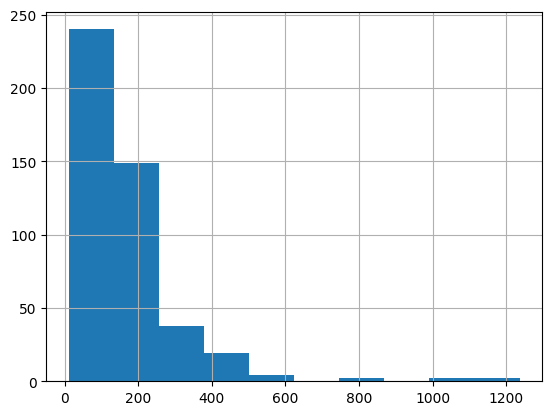

In [39]:
data['tokens_length'].hist()

In [40]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(data['article_tokenized'].values)]
tagged_data

[TaggedDocument(words=['name', 'and', 'territory', 'of', 'the', 'union', '1', 'india', 'that', 'is', 'bharat', 'shall', 'be', 'a', 'union', 'of', 'states', '2', 'the', 'states', 'and', 'the', 'territories', 'thereof', 'shall', 'be', 'as', 'specified', 'in', 'the', 'first', 'schedule', '3', 'the', 'territory', 'of', 'india', 'shall', 'comprise'], tags=[0]),
 TaggedDocument(words=['the', 'territories', 'of', 'the', 'states', 'the', 'union', 'territories', 'specified', 'in', 'the', 'first', 'schedule', 'and', 'such', 'other', 'territories', 'as', 'may', 'be', 'acquired'], tags=[1]),
 TaggedDocument(words=['admission', 'or', 'establishment', 'of', 'new', 'states', 'parliament', 'may', 'by', 'law', 'admit', 'into', 'the', 'union', 'or', 'establish', 'new', 'states', 'on', 'such', 'terms', 'and', 'conditions', 'as', 'it', 'thinks', 'fit'], tags=[2]),
 TaggedDocument(words=['sikkim', 'to', 'be', 'associated', 'with', 'the', 'union', 'rep', 'by', 'the', 'constitution', 'thirty', 'six', 'amendm

In [42]:
model = Doc2Vec(tagged_data, vector_size = 100, window = 10, min_count = 1, epochs = 100)

In [44]:
test_doc = word_tokenize('Special provisions with respect to the state of Andhra Pradesh'.lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

/var/folders/m6/ydbmjyvx5nz5ppn09gh7zky40000gn/T/ipykernel_81909/89829875.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive = [test_doc_vector])


[(442, 0.8910331130027771),
 (362, 0.8579129576683044),
 (224, 0.815256655216217),
 (438, 0.8098669648170471),
 (1, 0.8055908679962158),
 (198, 0.7805810570716858),
 (106, 0.7750361561775208),
 (316, 0.7749280333518982),
 (447, 0.7722115516662598),
 (229, 0.7664034366607666)]